In [1]:
import pandas as pd
import xarray as xa
from matplotlib import pyplot as plt
import seaborn as sns
from wisdom.data import load_responses

In [2]:
sns.set_context("talk")
cmap = sns.color_palette("Spectral_r", as_cmap=True)

In [3]:
inference = xa.open_dataset("../outputs/model_inference_anon.nc")

In [7]:
inferred_labels = inference.inferred_labels.to_pandas()
label_uncertainties = inference.label_uncertainty.to_pandas() / 1000

df = pd.concat([
    inferred_labels.stack().rename("inferred concern label"),
    label_uncertainties.stack().rename("confidence"),
], axis=1).reset_index().rename(columns={"hazard": "endpoint"})

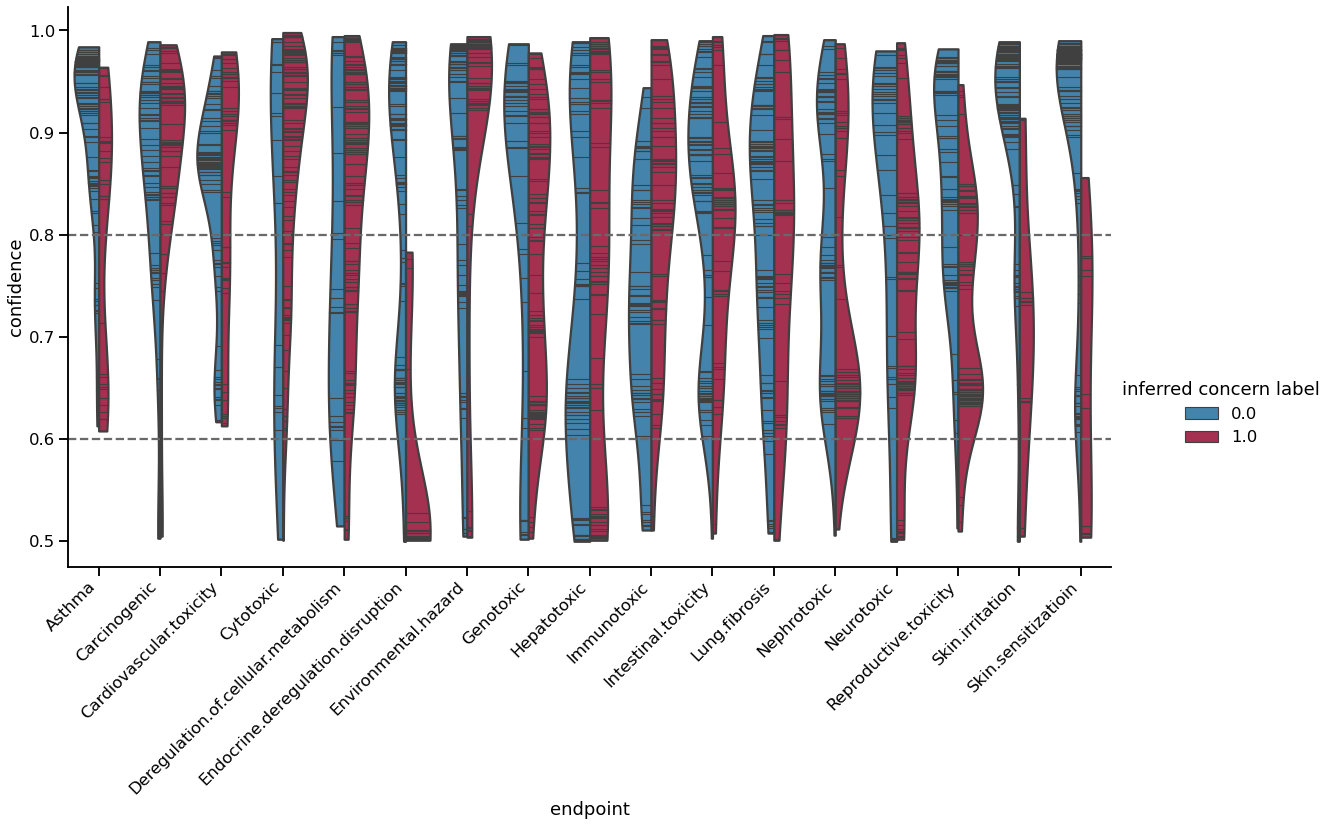

In [9]:
hue_order = [0.0, 1.0]
colors = [cmap(0.1), cmap(0.95)]

g=sns.catplot(
    data=df,
    x="endpoint",
    y="confidence",
    hue="inferred concern label",
    kind="violin",
    split=True,
    inner="stick",
    bw_adjust=0.1,
    cut=0,
    height=9,
    aspect=16/9,
    hue_order=hue_order,
    palette=colors
)
g.ax.axhline(0.6, linestyle="dashed", color="dimgray")
g.ax.axhline(0.8, linestyle="dashed", color="dimgray")
g.set_xticklabels(rotation=45, ha="right")